<a href="https://colab.research.google.com/github/TSeekasamit/deep-learning-tensorflow/blob/main/DS535_2_2563_Covid_19_Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks/SNA')
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks/SNA'

In [ ]:
!pip install networkx --quiet --upgrade

In [ ]:
import networkx as nx
print(nx.__version__)

2.5


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## **Dataset**

In [ ]:
column_names01 = ['Time_ID', 'User1', 'User2', 'Distance']
raw_df01 = pd.read_csv('Kissler_DataS1.csv', names = column_names01)
raw_df01.head(20)

,Time_ID,User1,User2,Distance
0,1,1,390,17
1,1,2,215,9
2,1,2,246,18
3,1,2,265,45
4,1,5,367,32
5,1,5,430,17
6,1,8,10,13
7,1,9,274,44
8,1,11,22,47
9,1,11,39,42


In [ ]:
raw_df01.shape
raw_df01.dtypes

Time_ID     int64
User1       int64
User2       int64
Distance    int64
dtype: object

In [ ]:
df = raw_df01[(raw_df01['Distance']>0) & (raw_df01['Distance']<5)]
df.shape

(8062, 4)

In [ ]:
df.head(20)

,Time_ID,User1,User2,Distance
35,1,35,253,4
38,1,36,457,3
68,1,74,262,3
70,1,75,183,2
80,1,83,380,4
121,1,118,129,3
122,1,118,302,4
123,1,121,387,1
133,1,133,205,3
140,1,142,159,3


In [ ]:
groups = df.groupby(['User1', 'User2'])
groups.first()

Time_ID  Distance
User1 User2                   
1     189        418         2
      390          6         2
2     21           2         3
3     234        535         4
      389        524         3
...              ...       ...
422   469        136         4
425   445        416         2
426   442        155         3
439   463        255         3
444   454        355         4

[495 rows x 2 columns]

In [ ]:
groups.get_group((3, 389))

,Time_ID,Distance
91258,524,3
94056,538,2
94688,541,3
94891,542,4
95941,547,4
97901,556,3
100271,566,1
100513,567,1
101910,573,1
102130,574,1


In [ ]:
edge_df = df.groupby(['User1', 'User2']).size().reset_index()
edge_df.head()

,User1,User2,0
0,1,189,1
1,1,390,39
2,2,21,43
3,3,234,11
4,3,389,11


In [ ]:
edge_df.rename(columns={0:'Number_of_Contacts'}, inplace=True)
edge_df.head()

,User1,User2,Number_of_Contacts
0,1,189,1
1,1,390,39
2,2,21,43
3,3,234,11
4,3,389,11


In [ ]:
edge_df.shape

(495, 3)

In [ ]:
edge_df = edge_df[edge_df['Number_of_Contacts']>3]
edge_df.shape

(167, 3)

# **Social Graph Analysis**

## Create a graph

In [ ]:
G = nx.from_pandas_edgelist(edge_df, source='User1', target='User2', edge_attr=['Number_of_Contacts'], create_using=nx.Graph())#nx.DiGraph()
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 211
Number of edges: 167
Average degree:   1.5829


In [ ]:
len(G.nodes)

211

In [ ]:
len(G.edges)

167

In [ ]:
G.nodes(data=True)

NodeDataView({1: {}, 390: {}, 2: {}, 21: {}, 3: {}, 234: {}, 389: {}, 4: {}, 196: {}, 8: {}, 10: {}, 12: {}, 342: {}, 13: {}, 437: {}, 14: {}, 307: {}, 337: {}, 15: {}, 238: {}, 371: {}, 16: {}, 191: {}, 19: {}, 403: {}, 26: {}, 30: {}, 60: {}, 28: {}, 357: {}, 32: {}, 180: {}, 182: {}, 195: {}, 35: {}, 253: {}, 400: {}, 36: {}, 301: {}, 457: {}, 38: {}, 452: {}, 39: {}, 171: {}, 334: {}, 44: {}, 242: {}, 427: {}, 46: {}, 47: {}, 291: {}, 48: {}, 49: {}, 295: {}, 318: {}, 332: {}, 263: {}, 449: {}, 52: {}, 408: {}, 57: {}, 58: {}, 189: {}, 61: {}, 197: {}, 65: {}, 421: {}, 72: {}, 73: {}, 74: {}, 262: {}, 75: {}, 183: {}, 80: {}, 245: {}, 83: {}, 163: {}, 380: {}, 84: {}, 227: {}, 86: {}, 127: {}, 190: {}, 87: {}, 174: {}, 201: {}, 275: {}, 448: {}, 88: {}, 142: {}, 89: {}, 209: {}, 92: {}, 93: {}, 95: {}, 106: {}, 107: {}, 96: {}, 302: {}, 99: {}, 229: {}, 101: {}, 438: {}, 108: {}, 364: {}, 109: {}, 230: {}, 118: {}, 129: {}, 122: {}, 141: {}, 185: {}, 462: {}, 130: {}, 352: {}, 133:

In [ ]:
G.edges(data=True)

EdgeDataView([(1, 390, {'Number_of_Contacts': 39}), (2, 21, {'Number_of_Contacts': 43}), (3, 234, {'Number_of_Contacts': 11}), (3, 389, {'Number_of_Contacts': 11}), (234, 389, {'Number_of_Contacts': 81}), (4, 196, {'Number_of_Contacts': 90}), (8, 10, {'Number_of_Contacts': 113}), (12, 342, {'Number_of_Contacts': 81}), (13, 437, {'Number_of_Contacts': 21}), (14, 307, {'Number_of_Contacts': 35}), (14, 337, {'Number_of_Contacts': 9}), (307, 337, {'Number_of_Contacts': 10}), (337, 336, {'Number_of_Contacts': 11}), (15, 238, {'Number_of_Contacts': 170}), (15, 371, {'Number_of_Contacts': 175}), (238, 371, {'Number_of_Contacts': 104}), (16, 191, {'Number_of_Contacts': 35}), (191, 46, {'Number_of_Contacts': 5}), (19, 403, {'Number_of_Contacts': 42}), (26, 30, {'Number_of_Contacts': 35}), (26, 60, {'Number_of_Contacts': 23}), (30, 60, {'Number_of_Contacts': 5}), (28, 357, {'Number_of_Contacts': 7}), (32, 180, {'Number_of_Contacts': 76}), (32, 182, {'Number_of_Contacts': 13}), (32, 195, {'Number

In [ ]:
edges = sorted(G.edges(data=True), key=lambda x: x[2]['Number_of_Contacts'], reverse=True)
edges[0:10]

[(142, 159, {'Number_of_Contacts': 362}),
 (75, 183, {'Number_of_Contacts': 301}),
 (325, 460, {'Number_of_Contacts': 260}),
 (74, 262, {'Number_of_Contacts': 204}),
 (295, 332, {'Number_of_Contacts': 203}),
 (322, 396, {'Number_of_Contacts': 197}),
 (15, 371, {'Number_of_Contacts': 175}),
 (52, 408, {'Number_of_Contacts': 171}),
 (15, 238, {'Number_of_Contacts': 170}),
 (35, 253, {'Number_of_Contacts': 158})]

## Visualize graph

In [ ]:
!apt install libgraphviz-dev --quiet
!pip install pygraphviz --quiet

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32-1ubuntu1 [112

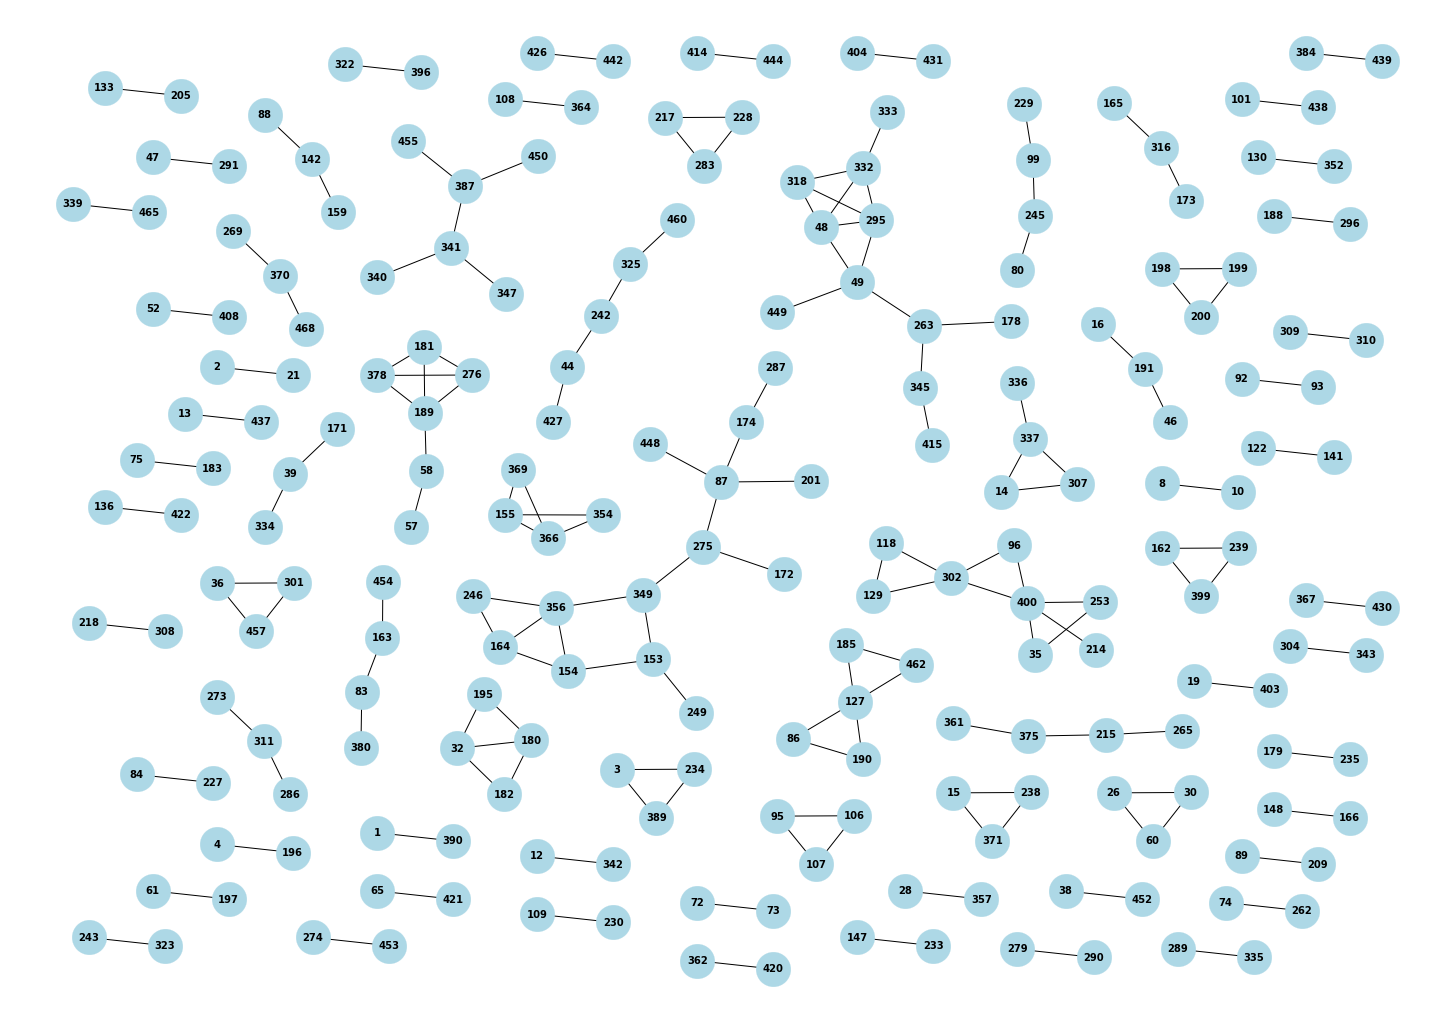

In [ ]:
import graphviz

plt.figure(figsize=(20, 14))

nx.draw(G, pos = nx.nx_pydot.graphviz_layout(G),
  node_size=1200, node_color='lightblue', linewidths=0.25,
  font_size=10, font_weight='bold', with_labels=True)

plt.show()

## Graph metrics

In [ ]:
nx.density(G)

0.007537801850598059

In [ ]:
#nx.average_shortest_path_length(G)

In [ ]:
nx.dijkstra_path(G, 246, 287)

[246, 356, 349, 275, 87, 174, 287]

In [ ]:
len(nx.dijkstra_path(G, 246, 287))-1

6

In [ ]:
nx.shortest_path(G, source=246, target=287)

[246, 356, 349, 275, 87, 174, 287]

In [ ]:
#nx.diameter(G)

In [ ]:
nx.is_connected(G)

False

## Connected Components

In [ ]:
components = nx.connected_components(G)
largest_component = max(components, key=len)

In [ ]:
type(largest_component)

set

In [ ]:
subG = G.subgraph(largest_component)

In [ ]:
nx.diameter(subG)

6

In [ ]:
nx.average_shortest_path_length(subG)

3.0549450549450547

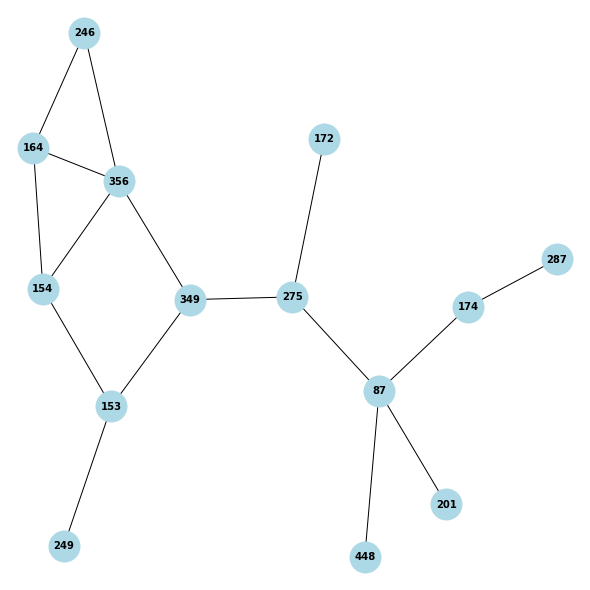

In [ ]:
plt.figure(figsize=(8, 8))

nx.draw(subG, pos = nx.nx_pydot.graphviz_layout(subG),
  node_size=1000, node_color='lightblue', linewidths=0.25,
  font_size=10, font_weight='bold', with_labels=True)

plt.show()

## Triadic Closure

In [ ]:
nx.transitivity(subG)

0.20689655172413793

In [ ]:
nx.transitivity(G)

0.5028901734104047

## **Centrality Measures**

### Degree

In [ ]:
degree_dict = dict(G.degree(G.nodes()))

In [ ]:
nx.set_node_attributes(G, degree_dict, 'degree')

In [ ]:
print(G.nodes[275])

{'degree': 3}


In [ ]:
from operator import itemgetter
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [ ]:
print("Top 10 nodes by degree:")
for d in sorted_degree[:10]:
  print(d)

Top 10 nodes by degree:
(400, 5)
(48, 4)
(49, 4)
(295, 4)
(332, 4)
(189, 4)
(127, 4)
(87, 4)
(302, 4)
(356, 4)


In [ ]:
G.edges(400)

EdgeDataView([(400, 35), (400, 96), (400, 214), (400, 253), (400, 302)])

In [ ]:
G.get_edge_data(400, 35)

{'Number_of_Contacts': 60}

### Betweenness

In [ ]:
betweenness_dict = dict(nx.betweenness_centrality(G))
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by betweenness:")
for d in sorted_betweenness[:10]:
  print(d)

Top 10 nodes by betweenness:
(275, 0.0021417179311916156)
(349, 0.001989823042454622)
(87, 0.0018683071314650262)
(49, 0.0013214855320118478)
(263, 0.0010480747322852587)
(356, 0.0009949115212273107)
(153, 0.0007290954659375712)
(400, 0.0006379585326953748)
(174, 0.0005468215994531784)
(302, 0.00045568466621098203)


### Closeness

In [ ]:
closeness_dict = dict(nx.closeness_centrality(G))
nx.set_node_attributes(G, closeness_dict, 'closeness')
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by closeness:")
for d in sorted_closeness[:10]:
  print(d)

Top 10 nodes by closeness:
(275, 0.02874149659863946)
(349, 0.02874149659863946)
(49, 0.026455026455026454)
(400, 0.025925925925925925)
(87, 0.025148809523809525)
(48, 0.023809523809523808)
(295, 0.023809523809523808)
(356, 0.023669467787114845)
(302, 0.02333333333333333)
(153, 0.022993197278911567)


### Eigenvector

In [ ]:
eigenvector_dict = dict(nx.eigenvector_centrality(G))
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by eigenvector:")
for d in sorted_eigenvector[:10]:
  print(d)

Top 10 nodes by eigenvector:
(48, 0.48765916017174854)
(295, 0.48765916017174854)
(332, 0.4381807577937035)
(318, 0.40964718173204195)
(49, 0.34719449580000933)
(333, 0.12698947972145622)
(263, 0.12206532930528517)
(449, 0.10062068586899063)
(345, 0.038619502374009754)
(178, 0.035375840642925524)


### PageRank

In [ ]:
pagerank_dict = dict(nx.pagerank(G))
nx.set_node_attributes(G, pagerank_dict, 'pagerank')
sorted_pagerank = sorted(pagerank_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by pagerank:")
for d in sorted_pagerank[:10]:
  print(d)

Top 10 nodes by pagerank:
(87, 0.009280706951756132)
(400, 0.009094546137164277)
(341, 0.008167792674720209)
(387, 0.008167792674720207)
(127, 0.007566309137773224)
(302, 0.007164860542506848)
(49, 0.00711813242947003)
(337, 0.006952338623936199)
(191, 0.0069106026727494)
(39, 0.0069106026727494)


### Eigenvector vs. Degree

In [ ]:
top_eigenvector = sorted_eigenvector[:10]

for te in top_eigenvector:
    degree = degree_dict[te[0]]
    print("Name: ", te[0], "| Eigenvector centrality: ", te[1], " | Degree centrality: ", degree)

Name:  48 | Eigenvector centrality:  0.48765916017174854  | Degree centrality:  4
Name:  295 | Eigenvector centrality:  0.48765916017174854  | Degree centrality:  4
Name:  332 | Eigenvector centrality:  0.4381807577937035  | Degree centrality:  4
Name:  318 | Eigenvector centrality:  0.40964718173204195  | Degree centrality:  3
Name:  49 | Eigenvector centrality:  0.34719449580000933  | Degree centrality:  4
Name:  333 | Eigenvector centrality:  0.12698947972145622  | Degree centrality:  1
Name:  263 | Eigenvector centrality:  0.12206532930528517  | Degree centrality:  3
Name:  449 | Eigenvector centrality:  0.10062068586899063  | Degree centrality:  1
Name:  345 | Eigenvector centrality:  0.038619502374009754  | Degree centrality:  2
Name:  178 | Eigenvector centrality:  0.035375840642925524  | Degree centrality:  1


In [ ]:
G.edges(48)

EdgeDataView([(48, 49), (48, 295), (48, 318), (48, 332)])

In [ ]:
G.get_edge_data(48, 49)

{'Number_of_Contacts': 10}

## Communnity Detection

In [ ]:
from networkx.algorithms import community
greedy_communities = community.greedy_modularity_communities(G)

In [ ]:
len(greedy_communities)

72

In [ ]:
import community
best_communities = community.best_partition(G)

In [ ]:
len(best_communities)

211

In [ ]:
greedy_communities[0]

frozenset({87,
           153,
           154,
           164,
           172,
           174,
           201,
           246,
           249,
           275,
           287,
           349,
           356,
           448})

In [ ]:
type(best_communities)

dict

In [ ]:
best_communities.keys()

dict_keys([1, 390, 2, 21, 3, 234, 389, 4, 196, 8, 10, 12, 342, 13, 437, 14, 307, 337, 15, 238, 371, 16, 191, 19, 403, 26, 30, 60, 28, 357, 32, 180, 182, 195, 35, 253, 400, 36, 301, 457, 38, 452, 39, 171, 334, 44, 242, 427, 46, 47, 291, 48, 49, 295, 318, 332, 263, 449, 52, 408, 57, 58, 189, 61, 197, 65, 421, 72, 73, 74, 262, 75, 183, 80, 245, 83, 163, 380, 84, 227, 86, 127, 190, 87, 174, 201, 275, 448, 88, 142, 89, 209, 92, 93, 95, 106, 107, 96, 302, 99, 229, 101, 438, 108, 364, 109, 230, 118, 129, 122, 141, 185, 462, 130, 352, 133, 205, 136, 422, 159, 147, 233, 148, 166, 153, 154, 249, 349, 164, 356, 155, 354, 366, 369, 162, 239, 399, 454, 246, 165, 316, 172, 173, 287, 178, 179, 235, 181, 276, 378, 188, 296, 198, 199, 200, 214, 215, 265, 375, 217, 228, 283, 218, 308, 325, 243, 323, 345, 269, 370, 273, 311, 274, 453, 279, 290, 286, 289, 335, 304, 343, 309, 310, 322, 396, 460, 333, 336, 339, 465, 340, 341, 347, 387, 415, 361, 362, 420, 367, 430, 468, 384, 439, 450, 455, 404, 431, 414, 44

In [ ]:
best_communities.values()

dict_values([0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18, 9, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 29, 30, 30, 31, 31, 31, 32, 32, 32, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 37, 14, 14, 28, 28, 38, 38, 39, 39, 40, 40, 14, 14, 41, 41, 31, 31, 42, 42, 43, 43, 44, 44, 34, 45, 45, 46, 46, 32, 32, 32, 32, 32, 32, 47, 47, 47, 47, 48, 48, 48, 29, 32, 49, 49, 32, 49, 32, 20, 50, 50, 22, 22, 22, 51, 51, 52, 52, 52, 14, 53, 53, 53, 54, 54, 54, 55, 55, 18, 56, 56, 20, 57, 57, 58, 58, 59, 59, 60, 60, 58, 61, 61, 62, 62, 63, 63, 64, 64, 18, 20, 7, 65, 65, 66, 66, 66, 66, 20, 53, 67, 67, 68, 68, 57, 69, 69, 66, 66, 70, 70, 71, 71, 33, 33])

In [ ]:
for i, c in enumerate(greedy_communities):
  print(i, c)

0 frozenset({448, 356, 164, 249, 201, 172, 174, 275, 246, 87, 153, 154, 349, 287})
1 frozenset({449, 295, 263, 332, 333, 48, 49, 178, 345, 318, 415})
2 frozenset({96, 129, 35, 302, 400, 118, 214, 253})
3 frozenset({58, 276, 181, 57, 378, 189})
4 frozenset({450, 387, 455, 340, 341, 347})
5 frozenset({462, 86, 185, 190, 127})
6 frozenset({325, 427, 460, 44, 242})
7 frozenset({32, 195, 180, 182})
8 frozenset({80, 229, 99, 245})
9 frozenset({369, 354, 155, 366})
10 frozenset({83, 380, 163, 454})
11 frozenset({336, 337, 307, 14})
12 frozenset({361, 375, 265, 215})
13 frozenset({234, 3, 389})
14 frozenset({371, 238, 15})
15 frozenset({26, 60, 30})
16 frozenset({457, 36, 301})
17 frozenset({171, 334, 39})
18 frozenset({16, 46, 191})
19 frozenset({106, 107, 95})
20 frozenset({88, 142, 159})
21 frozenset({162, 239, 399})
22 frozenset({316, 165, 173})
23 frozenset({200, 198, 199})
24 frozenset({217, 283, 228})
25 frozenset({273, 286, 311})
26 frozenset({370, 468, 269})
27 frozenset({1, 390})
28 

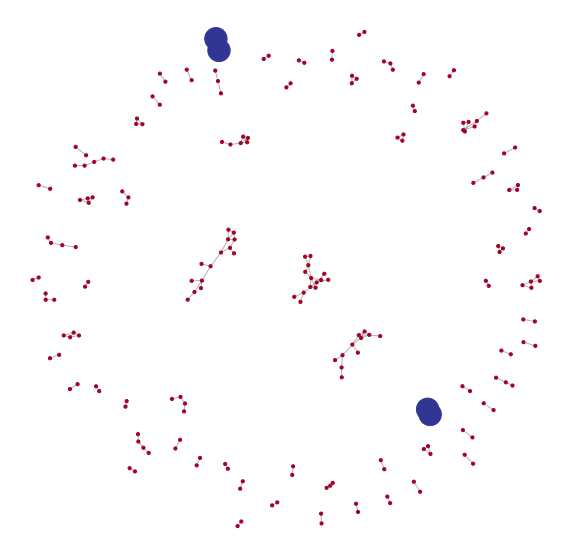

In [ ]:
modularity_dict = {}
for i, c in enumerate(greedy_communities):
  for name in c:
    modularity_dict[name] = i

pos = nx.spring_layout(G)
node_size = []

for node, community in modularity_dict.items():
  if community == 10:
    node_size.append(500)
  else:
    modularity_dict[node] =0
    node_size.append(10)
plt.figure(figsize=(10, 10))
plt.axis('off')
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.RdYlBu, node_color=list(modularity_dict.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

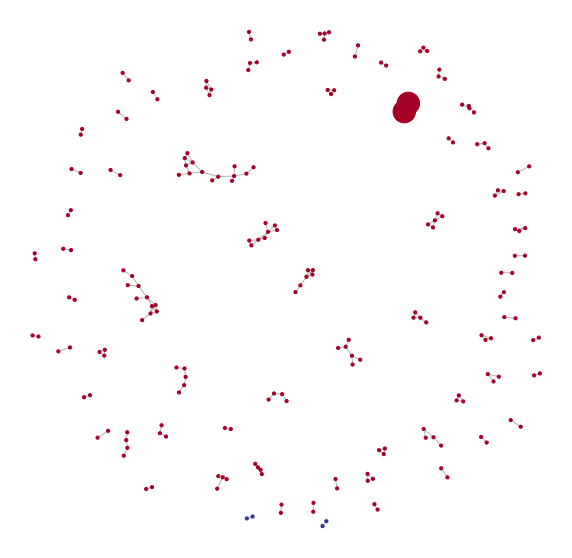

In [ ]:
pos = nx.spring_layout(G)
node_size = []

for node, community in best_communities.items():
  if community == 10:
    node_size.append(500)
  else:
    best_communities[node] =0
    node_size.append(10)
plt.figure(figsize=(10, 10))
plt.axis('off')
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.RdYlBu, node_color=list(modularity_dict.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

In [ ]:
for i, c in enumerate(greedy_communities):
  if len(c)>4:
    print('Community: ' + str(i)+':', list(c))

Community: 0: [448, 356, 164, 249, 201, 172, 174, 275, 246, 87, 153, 154, 349, 287]
Community: 1: [449, 295, 263, 332, 333, 48, 49, 178, 345, 318, 415]
Community: 2: [96, 129, 35, 302, 400, 118, 214, 253]
Community: 3: [58, 276, 181, 57, 378, 189]
Community: 4: [450, 387, 455, 340, 341, 347]
Community: 5: [462, 86, 185, 190, 127]
Community: 6: [325, 427, 460, 44, 242]


In [ ]:
#for node, community in best_communities.items():
#  if len(i)>4:
#    print('Community: ' + str(i)+':', list(c))

## Clique

In [ ]:
all_cliques = nx.find_cliques(G)

largest_clique = sorted(all_cliques, key=lambda x: len(x))[-1]

largest_clique

[181, 378, 276, 189]

## Recommended Friends

In [ ]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict
 
# Initialize the defaultdict: recommended
recommended = defaultdict(int)
 
# Iterate over all the nodes in G
for n, d in G.nodes(data = True):
 
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
     
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
         
            # Increment recommended
            recommended[(n1, n2)] += 1
 
# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[(182, 195), (49, 318), (49, 332), (154, 349), (153, 356), (154, 246), (354, 369)]


## Quakers Dataset

In [ ]:
nodelist_url = 'https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_nodelist.csv'
node_df = pd.read_csv(nodelist_url)
node_df.head()

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152


In [ ]:
edge_url='https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_edgelist.csv'
edge_df = pd.read_csv(edge_url)
edge_df.head()

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


In [ ]:
K = nx.from_pandas_edgelist(edge_df, source='Source', target='Target')
print(nx.info(K))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


In [ ]:
node_attr_dict = node_df.set_index('Name').to_dict('index')

In [ ]:
nx.set_node_attributes(K, node_attr_dict)

In [ ]:
K.nodes['George Keith']

{'Birthdate': 1638,
 'Deathdate': 1716,
 'Gender': 'male',
 'Historical Significance': 'Quaker schismatic and Church of England clergyman',
 'ID': 10006784}

In [ ]:
betweenness_dict = dict(nx.betweenness_centrality(K))
nx.set_node_attributes(K, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by betweenness:")
for d in sorted_betweenness[:10]:
  print(d)

Top 10 nodes by betweenness:
('William Penn', 0.23999456006192194)
('George Fox', 0.23683257726065213)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170327)
('James Nayler', 0.1044602628044609)
('Benjamin Furly', 0.06419626175167245)
('Thomas Ellwood', 0.04619062388510455)
('George Keith', 0.04500656400917155)
('John Audland', 0.041649363400775824)
('Alexander Parker', 0.03893676140525336)


## Games of Thrones
- https://github.com/mathbeveridge/asoiaf

In [ ]:
got_edge_df = pd.read_csv('dataset/asoiaf-all-edges.csv')
got_edge_df.head()

FileNotFoundError: ignored

In [ ]:
got_node_df = pd.read_csv('dataset/asoiaf-all-nodes.csv')
got_node_df.head()